In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [32]:
df = pd.read_csv('/Users/zoepan/Desktop/orie4741_project/data/county_2016_preprocessed1.csv')
df.dtypes

FIPS                      int64
County                   object
DEM                     float64
GOP                     float64
MedianIncome             object
MigraRate               float64
BirthRate               float64
DeathRate               float64
BachelorRate            float64
UnemploymentRate        float64
State                    object
zip                     float64
primary_city             object
latitude                float64
longitude               float64
estimated_population    float64
dtype: object

In [48]:
df_2012 = pd.DataFrame([df["State"], df["MedianIncome"],df["UnemploymentRate"],df["estimated_population"]]).transpose()
df_2012 = df_2012.replace(',','', regex=True)
df_2012["MedianIncome"] = df_2012["MedianIncome"].fillna(0)
df_2012["MedianIncome"] = df_2012["MedianIncome"].astype(str).astype(float)
df_2012.dtypes

State                    object
MedianIncome            float64
UnemploymentRate        float64
estimated_population    float64
dtype: object

Splitting regions based on wikipedia article (Census Bureau-designated regions and divisions)
https://en.wikipedia.org/wiki/List_of_regions_of_the_United_States

Region 1: Northeast  
- Division 1: New England (Connecticut, Maine, Massachusetts, New Hampshire, Rhode Island, and Vermont)  
- Division 2: Mid-Atlantic (New Jersey, New York, and Pennsylvania)

In [49]:
new_england_list = ["CT", "ME", "MA", "NH", "RI", "VT"]
mid_atlantic_list = ["NJ", "NY", "PA"]

northeast = df_2012[df_2012['State'].isin(new_england_list + mid_atlantic_list)]
new_england = df_2012[df_2012['State'].isin(new_england_list)]
mid_atlantic = df_2012[df_2012['State'].isin(mid_atlantic_list)]

In [58]:
medinc_northeast = northeast.groupby(['State']).mean()
medinc_northeast

,MedianIncome,UnemploymentRate,estimated_population
State,,,
CT,74289.500000,5.012500,5478.625000
MA,70210.642857,4.185714,7309.642857
ME,49084.562500,4.206250,4307.625000
NH,63218.400000,2.810000,4708.200000
NJ,75639.142857,5.338095,13437.142857
NY,57115.161290,5.116129,7630.096774
PA,52552.522388,5.904478,7828.522388
RI,67249.200000,4.840000,6187.200000
VT,54234.785714,3.657143,6305.428571


(array([1., 2., 0., 1., 0., 1., 1., 1., 0., 2.]),
 array([49084.5625    , 51740.02053571, 54395.47857143, 57050.93660714,
        59706.39464286, 62361.85267857, 65017.31071429, 67672.76875   ,
        70328.22678571, 72983.68482143, 75639.14285714]),
 <a list of 10 Patch objects>)

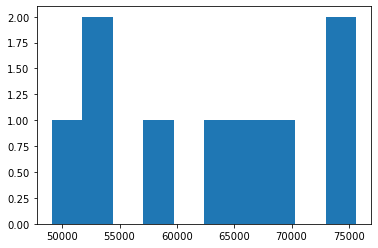

In [59]:
plt.hist(medinc_northeast["MedianIncome"])

Region 2: Midwest  
- Division 3: East North Central (Illinois, Indiana, Michigan, Ohio, and Wisconsin)  
- Division 4: West North Central (Iowa, Kansas, Minnesota, Missouri, Nebraska, North Dakota, and South Dakota)

In [51]:
east_north_central_list = ["IL", "IN", "MI", "OH", "WI"]
west_north_central_list = ["IA", "KS", "MN", "MO", "NE", "ND", "SD"]

midwest = df_2012[df_2012['State'].isin(east_north_central_list + west_north_central_list)]
east_north_central = df_2012[df_2012['State'].isin(east_north_central_list)]
west_north_central = df_2012[df_2012['State'].isin(west_north_central_list)]

Region 3: South
- Division 5: South Atlantic (Delaware, Florida, Georgia, Maryland, North Carolina, South Carolina, Virginia, District of Columbia, and West Virginia)
- Division 6: East South Central (Alabama, Kentucky, Mississippi, and Tennessee)
- Division 7: West South Central (Arkansas, Louisiana, Oklahoma, and Texas)

In [52]:
south_atlantic_list = ["DE", "FL", "GA", "MD", "NC", "VA", "DC", "WV"]
east_south_central_list = ["AL", "KY", "MS", "TN"]
west_south_central_list = ["AR", "LA", "OK", "TX"]

south = df_2012[df_2012['State'].isin(south_atlantic_list+east_south_central_list+west_south_central_list)]
south_atlantic = df_2012[df_2012['State'].isin(south_atlantic_list)]
east_south_central = df_2012[df_2012['State'].isin(east_south_central_list)]
west_south_central = df_2012[df_2012['State'].isin(west_south_central_list)]

Region 4: West
- Division 8: Mountain (Arizona, Colorado, Idaho, Montana, Nevada, New Mexico, Utah, and Wyoming)
- Division 9: Pacific (Alaska, California, Hawaii, Oregon, and Washington)

In [26]:
mountain_list = ["AZ", "CO", "ID", "MT", "NV", "NM", "UT", "WY"]
pacific_list = ["AK", "CA", "HI", "OR", "WA"]

west = df_2012[df_2012['State'].isin(mountain_list+pacific_list)]
mountain = df_2012[df_2012['State'].isin(mountain_list)]
pacific = df_2012[df_2012['State'].isin(pacific_list)]